IMPORTING LIBRARIES

In [11]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

LOADING DATA

In [14]:
import pandas as pd

# Reading the CSV file into a DataFrame with explicit encoding
data = pd.read_csv("C:\\Users\\Asus\\OneDrive\\Desktop\\Bharat Intern Data Science\\spam.csv", encoding='ISO-8859-1')

# Displaying information about the DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [15]:
# Dropping the redundent looking collumns (for this project)
to_drop = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
data = data.drop(data[to_drop], axis=1)
# Renaming the columns because I feel fancy today
data.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
data.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


DATA EXPLORATION

C:\Users\Asus\AppData\Local\Temp\ipykernel_15600\3389929414.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x=data["Target"], palette=cols)


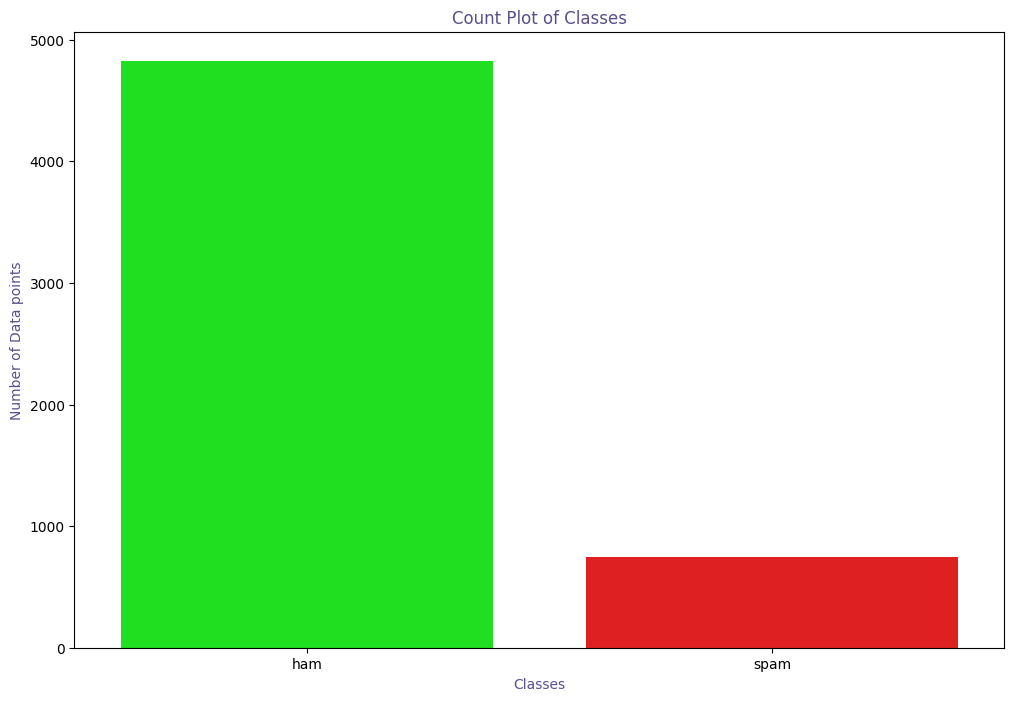

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for the plot (Red and Green)
cols = ["#00FF00", "#FF0000"]

# Create a count plot using seaborn
plt.figure(figsize=(12, 8))
fg = sns.countplot(x=data["Target"], palette=cols)

# Customize the title, x-axis label, y-axis label
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

# Show the plot
plt.show()


**FEATURE ENGINEERING**

In [17]:
import pandas as pd
import re

# Assuming 'data' is your DataFrame with columns 'Target' and 'Text'

# Feature 1: Text Length
data['text_length'] = data['Text'].apply(len)  # Number of characters

# Feature 2: Presence of Special Characters or Numbers
data['has_digits'] = data['Text'].str.contains('\d', regex=True)
data['has_special_chars'] = data['Text'].str.contains('[^A-Za-z0-9\s]', regex=True)

# Feature 3: Uppercase Percentage
data['uppercase_percentage'] = data['Text'].apply(lambda x: sum(1 for c in x if c.isupper()) / len(x) * 100 if len(x) > 0 else 0)

# Feature 4: Presence of URLs
data['has_url'] = data['Text'].str.contains('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', regex=True)

# Display the updated DataFrame
data.head()


,Target,Text,text_length,has_digits,has_special_chars,uppercase_percentage,has_url
0,ham,"Go until jurong point, crazy.. Available only ...",111,False,True,2.702703,False
1,ham,Ok lar... Joking wif u oni...,29,False,True,6.896552,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,True,True,6.451613,False
3,ham,U dun say so early hor... U c already then say...,49,False,True,4.081633,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,False,True,3.278689,False


<Figure size 1200x800 with 0 Axes>

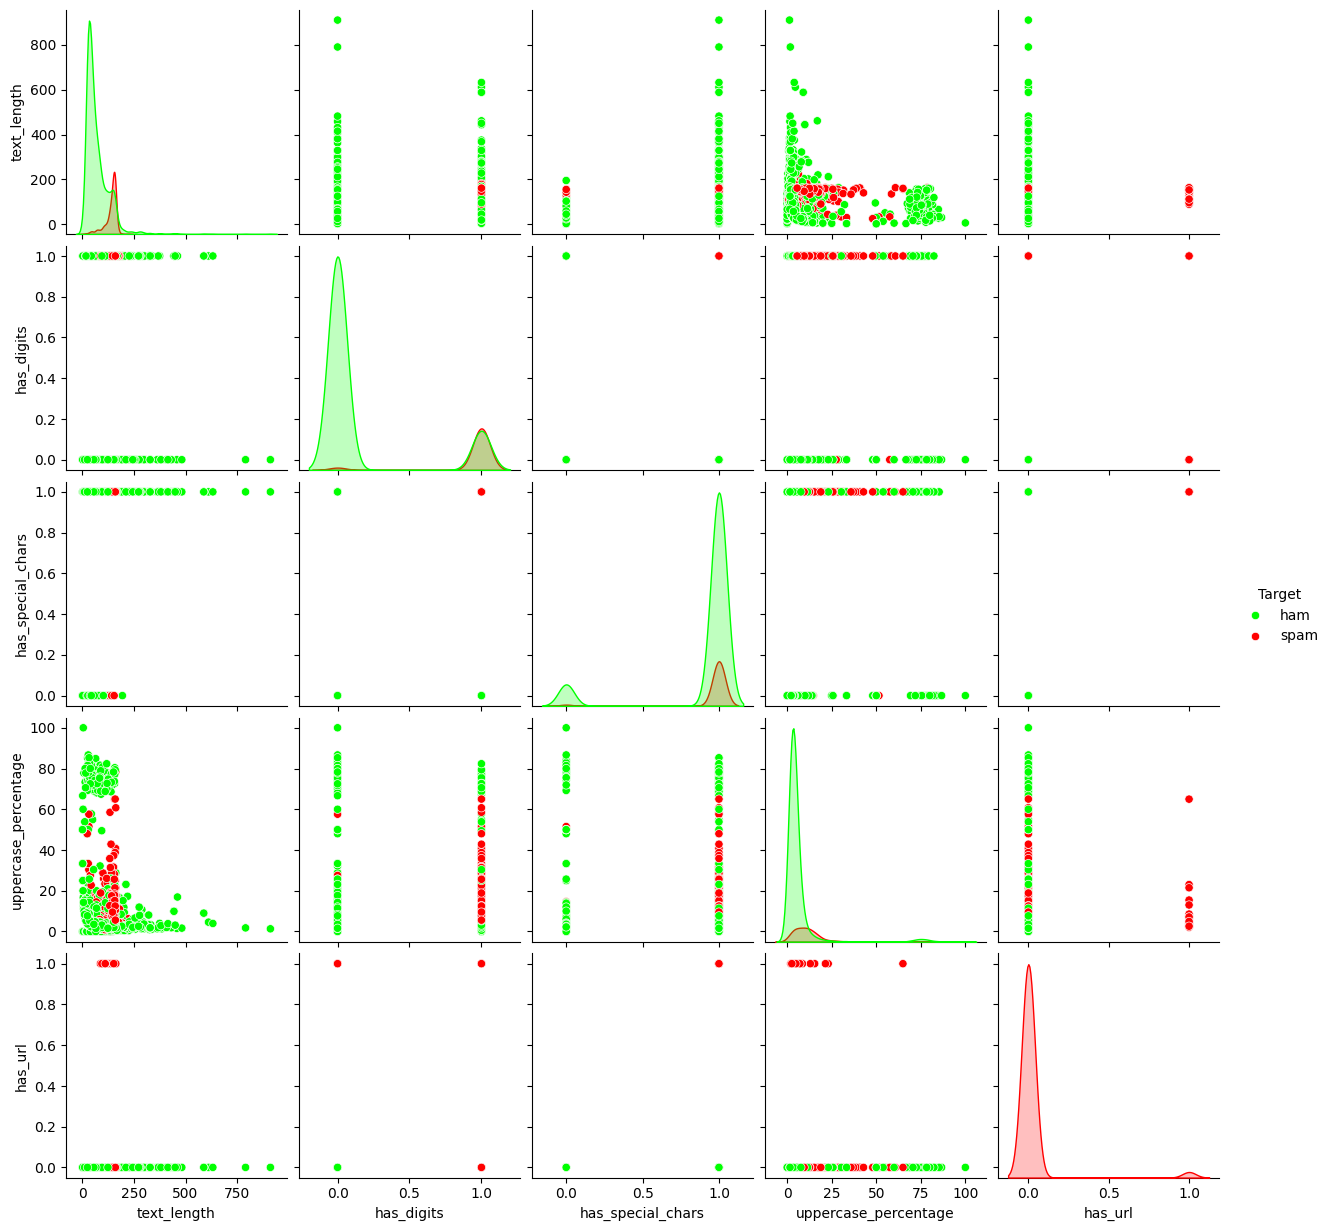

In [18]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="Target",palette=cols)
plt.show(fg)

OUTLIER DETECTION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
Shape after filtering outliers: (5548, 3)


<Figure size 1200x800 with 0 Axes>

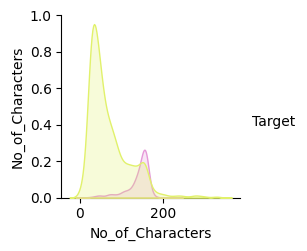

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the CSV file into a DataFrame with explicit encoding
data = pd.read_csv("C:\\Users\\Asus\\OneDrive\\Desktop\\Bharat Intern Data Science\\spam.csv", encoding='ISO-8859-1')

# Displaying information about the DataFrame
data.info()

# Dropping the redundant-looking columns (for this project)
to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
data = data.drop(to_drop, axis=1)

# Renaming the columns
data.rename(columns={"v1": "Target", "v2": "Text"}, inplace=True)

# Calculating the length of the text in the 'Text' column
data['No_of_Characters'] = data['Text'].apply(len)

# Filtering out rows with text length less than 350
data = data[data['No_of_Characters'] < 350]
print("Shape after filtering outliers:", data.shape)

# Visualizing pair plot
plt.figure(figsize=(12, 8))
cols = ["#E1F16B", "#E598D8"]
fg = sns.pairplot(data=data, hue="Target", palette=cols)
plt.show(fg)


DATA PREPREPROCESSING

In [20]:
# Printing a sample of the first 5 texts before cleaning
print("\033[1m\u001b[45;1m The First 5 Texts:\033[0m", *data["Text"][:5], sep="\n")


 The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [21]:
import re

# Defining a function to clean up the text
def clean_text(text):
    cleaned_text = re.sub('[^a-zA-Z]', ' ', text)  # Replacing all non-alphabetic characters with a space
    cleaned_text = cleaned_text.lower()  # Converting to lowercase
    cleaned_text = ' '.join(cleaned_text.split())  # Removing extra whitespaces
    return cleaned_text

# Applying the clean_text function to the 'Text' column and creating a new 'Clean_Text' column
data["Clean_Text"] = data["Text"].apply(clean_text)

# Displaying the first 5 texts after cleaning
print("\033[1m\u001b[45;1m The First 5 Texts after cleaning:\033[0m", *data["Clean_Text"][:5], sep="\n")


 The First 5 Texts after cleaning:
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


TOKENIZATION

Tokenization is breaking complex data into smaller units called tokens. It can be done by splitting paragraphs into sentences and sentences into words. I am splitting the Clean_Text into words at this step.

In [22]:
import nltk
nltk.download('punkt')  # Ensure the NLTK punkt tokenizer is downloaded

# Tokenization: Adding a new column "Tokenize_Text" with tokenized text
data["Tokenize_Text"] = data.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

# Printing the first 5 tokenized texts
print("\033[1m\u001b[45;1m The First 5 Texts after Tokenizing:\033[0m", *data["Tokenize_Text"][:5], sep="\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


 The First 5 Texts after Tokenizing:
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


REMOVING STOPWORDS

Stopwords are frequently occurring words(such as few, is, an, etc). These words hold meaning in sentence structure, but do not contribute much to language processing in NLP. For the purpose of removing redundancy in our processing, I am removing those. NLTK library has a set of default stopwords that we will be removing.

In [23]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')  # Ensure the NLTK stopwords are downloaded

# Removing stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

# Applying the remove_stopwords function to create a new column
data["Nostopword_Text"] = data["Tokenize_Text"].apply(remove_stopwords)

# Printing the first 5 texts after removing stopwords
print("\033[1m\u001b[45;1m The First 5 Texts after removing the stopwords:\033[0m", *data["Nostopword_Text"][:5], sep="\n")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 The First 5 Texts after removing the stopwords:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


LEMMATIZATION

**Stemming** is the process of getting the root form of a word. Stem or root is the part to which inflectional affixes are added. The stem of a word is created by removing the prefix or suffix of a word. It goes back to the etymology of the word. Languages evolve over time. Many different languages branch into each other; for example, English is a derivative of Latin. Thus, stemming a word takes it back to the root word.

**lemmatization** also converts a word to its root form. However, the difference is that lemmatization ensures that the root word belongs to the language one is dealing with, in our case it is English. If we use lemmatization the output would be in English.

In [24]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')  # Ensure the NLTK WordNet data is downloaded

# Initializing the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization function
def lemmatize_word(text):
    # Lemmatize each word in the text
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemmas

# Applying the lemmatization function to create a new column
data["Lemmatized_Text"] = data["Nostopword_Text"].apply(lemmatize_word)

# Printing the first 5 texts after lemmatization
print("\033[1m\u001b[45;1m The First 5 Texts after lemmatization:\033[0m", *data["Lemmatized_Text"][:5], sep="\n")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


 The First 5 Texts after lemmatization:
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


VECTORIZE

  **TF-IDF** in NLP stands for Term Frequency – Inverse document frequency. In NLP cleaned data needs to be converted into a numerical format where each word is represented by a matrix. This is also known as word embedding or Word vectorization.

**Term Frequency** (TF) = (Frequency of a term in the document)/(Total number of terms in documents) **Inverse Document Frequency(IDF)** = log( (total number of documents)/(number of documents with term t)), I will be using TfidfVectorizer() to vectorize the preprocessed data.

Steps in the Vectorizing:

Creating a corpus of lemmatized text

Converting the corpus in vector form

Label Encoding the classes in Target

In [25]:
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder
label_encoder = LabelEncoder()

# Encoding the 'Target' variable
y = label_encoder.fit_transform(data['Target'])


In [26]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

corpus[:5]
print("\033[1m\u001b[45;1m The First 5 lines in corpus :\033[0m",*corpus[:5], sep = "\n")

 The First 5 lines in corpus :
go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'corpus' is the list of cleaned texts
# Creating TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Transforming the corpus into TF-IDF vectors
X = tfidf_vectorizer.fit_transform(corpus).toarray()

# Displaying the type of the feature matrix
print("Type of feature matrix X:", X.dtype)


Type of feature matrix X: float64


In [28]:
#Label encode the Target and use it as y
label_encoder = LabelEncoder()
data["Target"] = label_encoder.fit_transform(data["Target"])

In [29]:
# Assuming 'corpus' is the list of cleaned texts
# Creating TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fitting the vectorizer on the entire dataset
X_tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()


MODEL BUILDING

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Encoding the 'Target' variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Target'])

# Creating a corpus of lemmatized text
corpus = []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

# Changing text data into numbers
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

# Splitting the testing and training sets with stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Build a pipeline of models for four different classifiers
# Naïve Bayes
nb_model = Pipeline([
    ('classifier', MultinomialNB())
])

# RandomForestClassifier
rf_model = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

# KNeighborsClassifier
knn_model = Pipeline([
    ('classifier', KNeighborsClassifier())
])

# Support Vector Machines
svm_model = Pipeline([
    ('classifier', SVC())
])

# Fit all the models on the training data
nb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Get cross-validation on the training set for all the models for accuracy
models = [nb_model, rf_model, knn_model, svm_model]
model_names = ['Naïve Bayes', 'RandomForest', 'KNeighbors', 'SVM']

for model, name in zip(models, model_names):
    cross_val_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f'{name} Cross-Validation Accuracy: {cross_val_acc.mean()}')


Naïve Bayes Cross-Validation Accuracy: 0.9632715297033222
RandomForest Cross-Validation Accuracy: 0.9783684755781712
KNeighbors Cross-Validation Accuracy: 0.9100960317702145
SVM Cross-Validation Accuracy: 0.9756639954497903


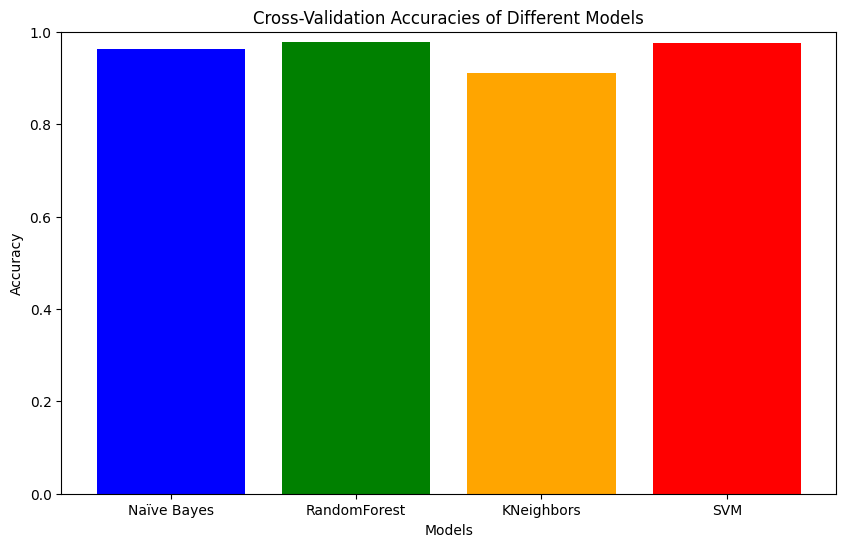

In [31]:
import matplotlib.pyplot as plt

# Cross-validation accuracies
cross_val_accuracies = []

for model in models:
    cross_val_acc = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    cross_val_accuracies.append(cross_val_acc)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, cross_val_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.title('Cross-Validation Accuracies of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.show()


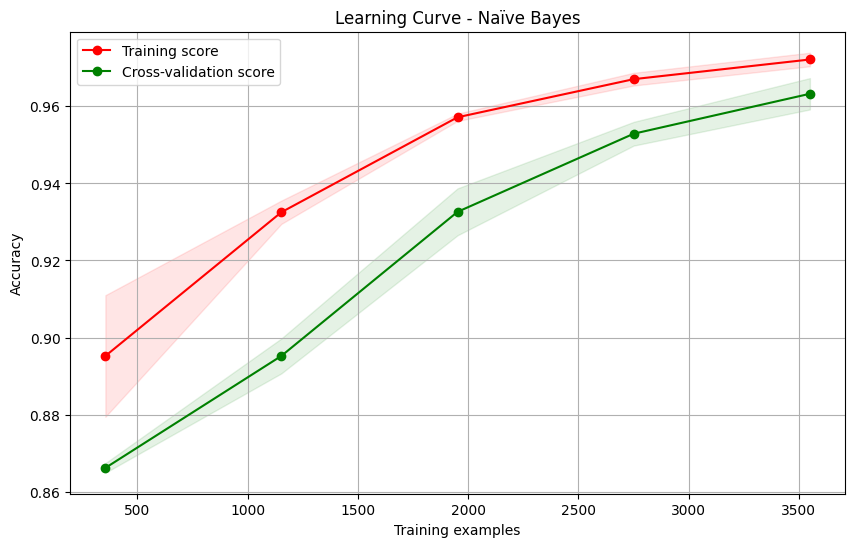

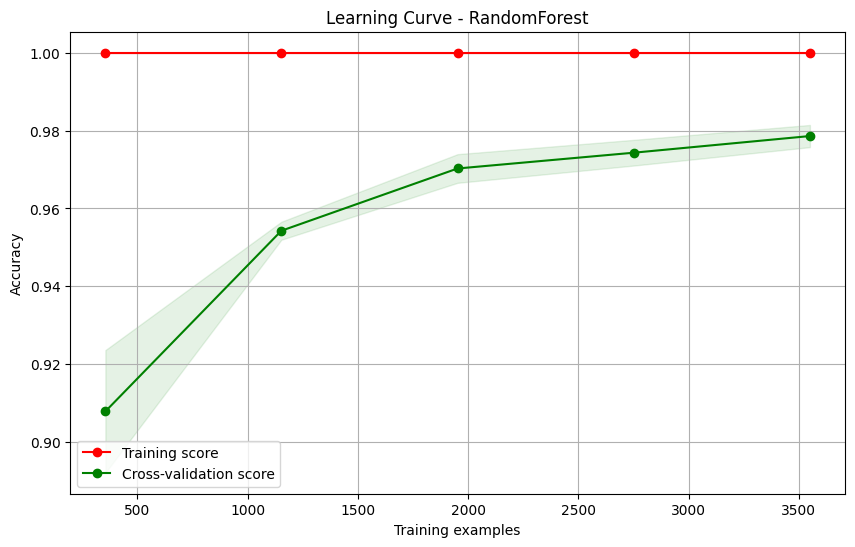

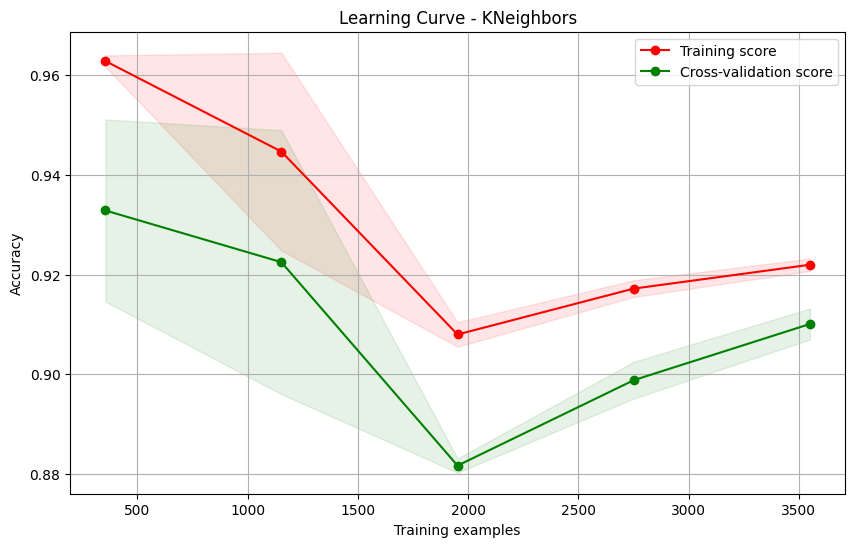

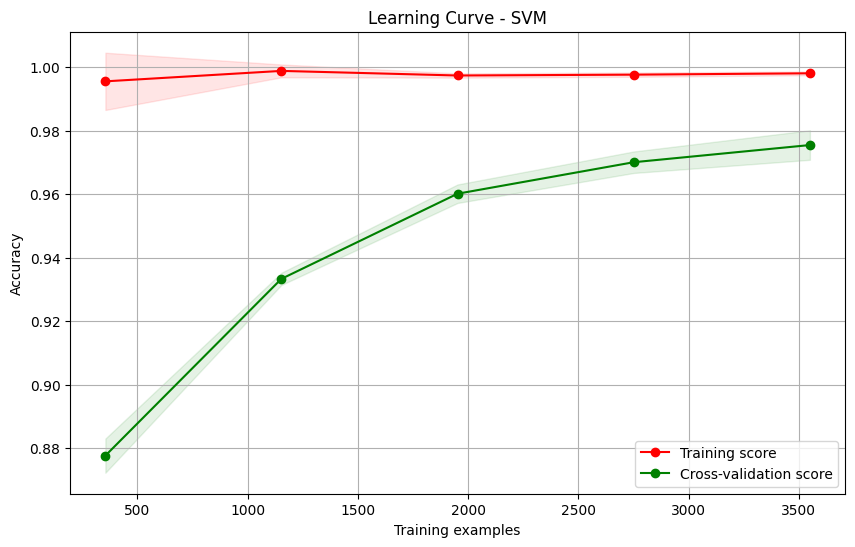

In [32]:
import numpy as np
from sklearn.model_selection import learning_curve

# Learning curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotting the learning curve for each model
for model, name in zip(models, model_names):
    plot_learning_curve(model, f"Learning Curve - {name}", X_train, y_train, cv=5)

plt.show()


In [4]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
file_path = "C:\\Users\\Asus\\OneDrive\\Desktop\\Bharat Intern Data Science\\spam.csv"
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the data
print(data.head())

# Function to clean the text
def clean_text(text):
    cleaned_text = re.sub('[^a-zA-Z]', ' ', str(text))
    cleaned_text = cleaned_text.lower()
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

# Clean the 'Text' column
data['Clean_Text'] = data['v2'].apply(clean_text)

# Encoding the 'Target' variable (assuming 'ham' as 0 and 'spam' as 1)
data['Target'] = data['v1'].map({'ham': 0, 'spam': 1})

# Creating TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features as needed

# Fitting the vectorizer on the entire dataset
X_tfidf = tfidf_vectorizer.fit_transform(data['Clean_Text']).toarray()
y = data['Target']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Creating and training the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2%}")


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Accuracy on the test set: 97.58%


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Assuming you have a DataFrame named 'data' with 'No_of_Characters' and 'Target' columns
# Modify the following lines based on your actual data

# Example data
data = pd.DataFrame({
    'No_of_Characters': [100, 150, 200, 250, 300],
    'Target': ['spam', 'ham', 'ham', 'spam', 'ham']
})

# Filter data for spam and ham
spam_data = data[data['Target'] == 'spam']
ham_data = data[data['Target'] == 'ham']

# Function to create GIF for a given category
def create_gif(category_data, category_name):
    plt.figure(figsize=(6, 4))
    sns.lineplot(x='No_of_Characters', y='Target', data=category_data, marker='o')
    plt.title(f'No_of_Characters vs Target ({category_name})')
    plt.xlabel('No_of_Characters')
    plt.ylabel('Target')
    
    # Save the frame as an image
    plt.savefig(f'{category_name}_animation_frame.png')
    plt.close()

# Create GIF for spam
create_gif(spam_data, 'spam')

# Create GIF for ham
create_gif(ham_data, 'ham')


In [21]:
from IPython.display import HTML, display
import time

# Input Section
new_sms = input("Enter the SMS text: ")

# Cleaning the input text
cleaned_sms = clean_text(new_sms)

# Simulating a delay for demonstration purposes
time.sleep(2)

# Transforming the cleaned text into a TF-IDF vector (assuming you have already defined tfidf_vectorizer)
new_sms_tfidf = tfidf_vectorizer.transform([cleaned_sms]).toarray()

# Simulating model prediction delay
time.sleep(2)

# Making the prediction using the trained RandomForest model (replace 'rf_model' with your actual model)
prediction = rf_model.predict(new_sms_tfidf)

# Displaying GIFs for spam and ham classification
spam_gif_url = "https://78.media.tumblr.com/39d068aa82dee0bcbb26b84cc9f5a592/tumblr_ofmu11OlKg1rqe0rbo1_500.gif"  # Replace with the actual URL of your spam GIF
ham_gif_url = "https://66.media.tumblr.com/410c9b699fc7f950591a04c7f9763a27/tumblr_na9i90Vb0l1qbq5g5o2_r1_500.gif"    # Replace with the actual URL of your ham GIF

# Conditionally include only the relevant GIF based on the prediction result
if prediction == 0:
    result_html = f"""
        <div style='font-size: 18px; padding: 10px; text-align: center; color: green;'>
            The SMS is classified as ham.
        </div>
        <div style='text-align: center;'>
            <a href='{ham_gif_url}' target='_blank'>
                <img src='{ham_gif_url}' alt='Ham' style='width: 300px; height: 300px;'>
            </a>
        </div>
    """
else:
    result_html = f"""
        <div style='font-size: 18px; padding: 10px; text-align: center; color: red;'>
            The SMS is classified as spam.
        </div>
        <div style='text-align: center;'>
            <a href='{spam_gif_url}' target='_blank'>
                <img src='{spam_gif_url}' alt='Spam' style='width: 300px; height: 300px;'>
            </a>
        </div>
    """

display(HTML(result_html))


In [22]:
from IPython.display import HTML, display
import time

# Input Section
new_sms = input("Enter the SMS text: ")

# Cleaning the input text
cleaned_sms = clean_text(new_sms)

# Simulating a delay for demonstration purposes
time.sleep(2)

# Transforming the cleaned text into a TF-IDF vector (assuming you have already defined tfidf_vectorizer)
new_sms_tfidf = tfidf_vectorizer.transform([cleaned_sms]).toarray()

# Simulating model prediction delay
time.sleep(2)

# Making the prediction using the trained RandomForest model (replace 'rf_model' with your actual model)
prediction = rf_model.predict(new_sms_tfidf)

# Displaying GIFs for spam and ham classification
spam_gif_url = "https://78.media.tumblr.com/39d068aa82dee0bcbb26b84cc9f5a592/tumblr_ofmu11OlKg1rqe0rbo1_500.gif"  # Replace with the actual URL of your spam GIF
ham_gif_url = "https://66.media.tumblr.com/410c9b699fc7f950591a04c7f9763a27/tumblr_na9i90Vb0l1qbq5g5o2_r1_500.gif"    # Replace with the actual URL of your ham GIF

# Conditionally include only the relevant GIF based on the prediction result
if prediction == 0:
    result_html = f"""
        <div style='font-size: 18px; padding: 10px; text-align: center; color: green;'>
            The SMS is classified as ham.
        </div>
        <div style='text-align: center;'>
            <a href='{ham_gif_url}' target='_blank'>
                <img src='{ham_gif_url}' alt='Ham' style='width: 300px; height: 300px;'>
            </a>
        </div>
    """
else:
    result_html = f"""
        <div style='font-size: 18px; padding: 10px; text-align: center; color: red;'>
            The SMS is classified as spam.
        </div>
        <div style='text-align: center;'>
            <a href='{spam_gif_url}' target='_blank'>
                <img src='{spam_gif_url}' alt='Spam' style='width: 300px; height: 300px;'>
            </a>
        </div>
    """

display(HTML(result_html))
